<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

<font size='8'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>New GRFP</font></h2> 


In [4]:
simulation_manager = SimulationManager() 
simulation_manager.restart_nvidia_cuda_mps_control()

Cannot find MPS control daemon process


0202


In [5]:
!./test_script
!nvidia-smi

02Mon May 22 23:57:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:01:00.0 Off |                    0 |
| N/A   30C    P0    74W / 500W |      0MiB / 81920MiB |      6%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A 

In [12]:
%%bash

echo quit | nvidia-cuda-mps-control

Cannot find MPS control daemon process


CalledProcessError: Command 'b'\necho quit | nvidia-cuda-mps-control\n'' returned non-zero exit status 1.

In [11]:
%%bash

export CUDA_MPS_PIPE_DIRECTORY=/tmp/mps-pipe_$SLURM_TASK_PID;
export CUDA_MPS_LOG_DIRECTORY=/tmp/mps-log_$SLURM_TASK_PID;
mkdir -p $CUDA_MPS_PIPE_DIRECTORY;
mkdir -p $CUDA_MPS_LOG_DIRECTORY
nvidia-cuda-mps-control -d

An instance of this daemon is already running


CalledProcessError: Command 'b'\nexport CUDA_MPS_PIPE_DIRECTORY=/tmp/mps-pipe_$SLURM_TASK_PID;\nexport CUDA_MPS_LOG_DIRECTORY=/tmp/mps-log_$SLURM_TASK_PID;\nmkdir -p $CUDA_MPS_PIPE_DIRECTORY;\nmkdir -p $CUDA_MPS_LOG_DIRECTORY\nnvidia-cuda-mps-control -d\n'' returned non-zero exit status 1.

In [5]:
%%bash

echo $CUDA_MPS_PIPE_DIRECTORY

In [1]:
from umbrella_sampling import ComUmbrellaSampling, CustomObservableUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation, Observable, Force
import os
import matplotlib.pyplot as plt

<font size='8'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Multi-replicas</font></h2> 

In [6]:
sim_manager = SimulationManager()

path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/new_grfp/quick_results_2.5e8'
replicas = list(range(4))
sim_dir_list = [f'{file_dir}/{rep}' for rep in replicas]

sim_list = [Simulation(file_dir, sim_dir) for sim_dir in sim_dir_list]

sim_parameters = [{'temperature':'37C',  'salt_concentration':'0.15','interaction_type':'RNA2', 'mismatch_repulsion':'1','steps':'2.5e8','print_energy_every': '5e5','print_conf_interval':'5e5'} for _ in replicas]
# for sim_parameter, sim in zip(sim_parameters, sim_list):
#     sim.build(clean_build='force')
#     sim.input_file(sim_parameter)
#     sim_manager.queue_sim(sim)

In [5]:
sim_manager.run()

spawning
Running: 0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	614.262 KB written to files
	 62.000  B written to stdout/stderr
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	614.099 KB written to files
	 62.000  B written to stdout/stderr


Running: 1
Running: 2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	614.137 KB written to files
	 62.000  B written to stdout/stderr


Running: 3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	614.207 KB written to files
	 62.000  B written to stdout/stderr


In [8]:
import time
for sim in sim_list[::2]:
    sim.analysis.view_last()

<font size='8'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Protein Only</font></h2> 


In [3]:
sim_manager = SimulationManager()

path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/mold/protein/c2'
replicas = list(range(4))
sim_dir_list = [f'{file_dir}/{rep}' for rep in replicas]

sim_list = [Simulation(file_dir, sim_dir) for sim_dir in sim_dir_list]

sim_parameters = [{'dt':f'0.0002','steps':'1e6','print_energy_every': '5e3','print_conf_interval':'5e3'} for _ in replicas]
for sim_parameter, sim in zip(sim_parameters, sim_list):
    sim.build(clean_build='force')
    sim.input_file(sim_parameter)
    sim.add_protein_par()
    sim_manager.queue_sim(sim)

In [4]:
sim_manager.run()

spawning
Running: 0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	185.191 KB written to files
	 62.000  B written to stdout/stderr


Running: 1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	185.126 KB written to files
	 62.000  B written to stdout/stderr


Running: 2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	185.077 KB written to files
	 62.000  B written to stdout/stderr


Running: 3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	185.046 KB written to files
	 62.000  B written to stdout/stderr


Run time: 106.1925850780026
Finished: 0
Run time: 104.31622499400328
Finished: 3
Run time: 105.20196322799893
Finished: 2
Run time: 106.3890683239988
Finished: 1
All queued simulations finished in: 110.4519668569992


In [12]:
import time
for sim in sim_list[0:1]:
    time.sleep(2.5)
    sim.analysis.view_last()

In [3]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/synbody/bound'
system = '3_bound_umbrella_test_1'

# com_list = '3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530'
com_list = '3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530'

ref_1 = '1623,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622'
ref_2 = '2744,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743'
ref_3 = '500,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499'
ref_1_len=192

ref_list = ref_1 + ',' + ref_2 + ',' + ref_3
xmin = 0
xmax = 20
n_windows = 60

stiff = 1

equlibration_parameters = {'dt':'0.001','steps':'5e6','print_energy_every': '5e5',
                           'print_conf_interval':'5e5'
                          }

production_parameters ={'dt':'0.001','steps':'2e6','print_energy_every': '5e4',
                        'print_conf_interval':'5e4'
                        }

us = ComUmbrellaSampling(file_dir, system)
simulation_manager = SimulationManager()

In [4]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters,
                           observable=True, sequence_dependant=False, print_every=1e3, name='com_distance.txt', protein=True, force_file=True)

In [5]:
simulation_manager.run()

spawning


Process Process-2:
Traceback (most recent call last):
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/scratch/mlsample/ipy_oxDNA/src/oxdna_simulation.py", line 488, in worker_manager
    sim_mem = self.gpu_memory_queue.get()
  File "<string>", line 2, in get
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/managers.py", line 818, in _callmethod
    kind, result = conn.recv()
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/home/mlsample/.conda/envs/oxdna/lib/python3.10/multiprocessing/connection.py", line 3

In [58]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters,
                           observable=True, sequence_dependant=False, print_every=1e3, name='com_distance.txt', protein=True, force_file=True)

In [59]:
simulation_manager.run()

spawning
Running: 0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.26 MB/s



Running: 1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.14 MB/s



Running: 2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.27 MB/s



Running: 3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.17 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.14 MB/s



Running: 4
Running: 5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.26 MB/s



Running: 6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of    0.985 MB/s



Running: 7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.29 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.17 MB/s



Running: 8
Running: 9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.27 MB/s



Running: 10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.26 MB/s



Running: 11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.24 MB/s



Running: 12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.27 MB/s



Running: 13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.12 MB/s



Running: 14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.09 MB/s



Running: 15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of      1.3 MB/s



Running: 16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of      1.3 MB/s



Running: 17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.18 MB/s



Running: 18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.23 MB/s



Running: 19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.34 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.21 MB/s



Running: 20
Running: 21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.32 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.36 MB/s



Running: 22
Running: 23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.34 MB/s



Running: 24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.32 MB/s



Running: 25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.34 MB/s



Running: 26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.36 MB/s



Running: 27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.29 MB/s



Running: 28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.005 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.17 MB/s



Running: 29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.32 MB/s



Running: 30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.24 MB/s



Run time: 576.2092063630698
Exception encountered in /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/synbody/bound/3_bound_umbrella_test/production/0:
str: Traceback (most recent call last):
  File "/scratch/mlsample/ipy_oxDNA/src/oxdna_simulation.py", line 332, in run_complete
    manager.run_complete()
oxpy.core.OxDNAError: Invalid cell -2147483648 for particle 0 (pos: nan nan nan)



INFO: Lists updated 3872 times (every ~351.693698 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 54.263 MB written to files
	  1.695 KB written to stdout/stderr
	For a total of   0.0994 MB/s



Simulation exception encountered in /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/synbody/bound/3_bound_umbrella_test/production/0:
Traceback (most recent call last):
  File "/scratch/mlsample/ipy_oxDNA/src/oxdna_simulation.py", line 332, in run_complete
    manager.run_complete()
oxpy.core.OxDNAError: Invalid cell -2147483648 for particle 0 (pos: nan nan nan)

Running: 31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.34 MB/s

INFO: # Caught SIGNAL 15; setting stop = 1



Run time: 484.1882776429411
Finished: 30
Run time: 519.9815788000124
Finished: 19
Run time: 558.1253332170891
Finished: 7
Run time: 489.8155785710551
Finished: 28
Run time: 487.1292703440413
Finished: 29
Run time: 539.2697222819552
Finished: 13
Run time: 560.9311902739573
Finished: 6
Run time: 570.8433807570254Run time: 532.866196577088

Finished: 3Finished: 15

Run time: 564.1737726379652
Run time: 567.3607696109684Finished: 5

Finished: 4
Run time: 526.3262311050203
Finished: 17
Run time: 548.7976495990297
Finished: 10
Run time: 536.2415674979566
Finished: 14
Run time: 542.3384499599924
Finished: 12
Run time: 507.3721563729923
Finished: 22
Run time: 492.95848994597327
Finished: 27
Run time: 496.1997062979499
Finished: 26
Run time: 512.8109760059742
Run time: 552.03828728199Finished: 21

Finished: 9Run time: 573.9777639129898

Finished: 2
Run time: 529.9370297379792
Finished: 16
Run time: 545.8136169180507
Finished: 11
Run time: 501.81050896295346
Finished: 24Run time: 504.62717343901

INFO: Lists updated 2592 times (every ~456.041281 steps)
INFO: Lists updated 2779 times (every ~454.280677 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 47.230 MB written to files
	  1.453 KB written to stdout/stderr
	For a total of    0.103 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 51.244 MB written to files
	  1.574 KB written to stdout/stderr
	For a total of    0.104 MB/s

INFO: Lists updated 2965 times (every ~458.312648 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 55.266 MB written to files
	  1.695 KB written to stdout/stderr
	For a total of    0.104 MB/s

INFO: Lists updated 2582 times (every ~453.912084 steps)
INFO: Lists updated 2830 times (every ~455.988693 steps)
INFO: Lists updated 2934 times (every ~457.459100 steps)
INFO: Lists updated 2910 times (every ~453.795189 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 51.248 MB written to

Run time: 515.5657959139207
Finished: 20
Run time: 523.3498369070003
Finished: 18


INFO: Lists updated 2633 times (every ~455.315230 steps)
INFO: Lists updated 2752 times (every ~454.215480 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 49.240 MB written to files
	  1.514 KB written to stdout/stderr
	For a total of    0.102 MB/s

INFO: Lists updated 2750 times (every ~454.909455 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 47.226 MB written to files
	  1.453 KB written to stdout/stderr
	For a total of    0.101 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 47.224 MB written to files
	  1.453 KB written to stdout/stderr
	For a total of      0.1 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 55.266 MB written to files
	  1.695 KB written to stdout/stderr
	For a total of    0.101 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 49.236 MB written to files
	  1.514 KB written to stdout/stderr
	For a total of

Run time: 556.4243494999828
Finished: 8
Run time: 577.9489474620204
Finished: 1
Run time: 500.4402596040163
Finished: 25


INFO: Lists updated 2962 times (every ~455.773464 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 55.274 MB written to files
	  1.695 KB written to stdout/stderr
	For a total of    0.105 MB/s

INFO: Lists updated 3079 times (every ~454.693407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 57.278 MB written to files
	  1.756 KB written to stdout/stderr
	For a total of    0.104 MB/s

INFO: Lists updated 2644 times (every ~453.858169 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 49.241 MB written to files
	  1.514 KB written to stdout/stderr
	For a total of    0.104 MB/s



Run time: 2.9609580680262297
Finished: 31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.004 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.29 MB/s



In [53]:
us.equlibration_sims[15].analysis.view_last()
    

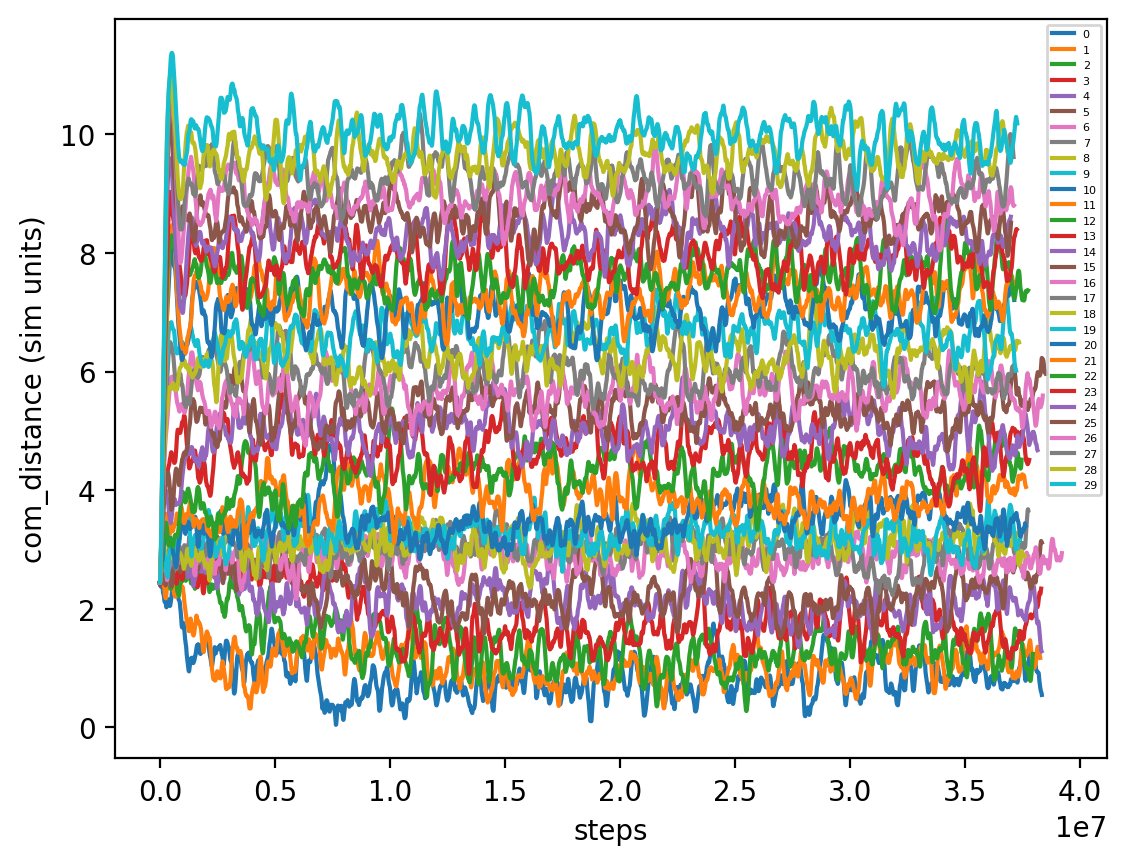

In [46]:
us.com_distance_observable(com_list, ref_list)
plt.figure(dpi=200)
for idx in range(0,30,1):
    us.analysis.view_observable('eq', idx, sliding_window=False)#, observable=us.observables_list[0], sliding_window=20)
plt.legend(fontsize=4)
# plt.ylim(0, 15)

In [20]:
for idx in range(0,48):
    print(idx)
    us.equlibration_sims[idx].sim_files.last_conf

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


AttributeError: 'SimFiles' object has no attribute 'last_conf'

In [16]:
us.analysis.view_conf('eq', 13)

In [19]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/src/wham/wham')
n_bins = '50'
tol = '1e-7'
n_boot = '30'
us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...


FileNotFoundError: [Errno 2] No such file or directory: 'freefile'

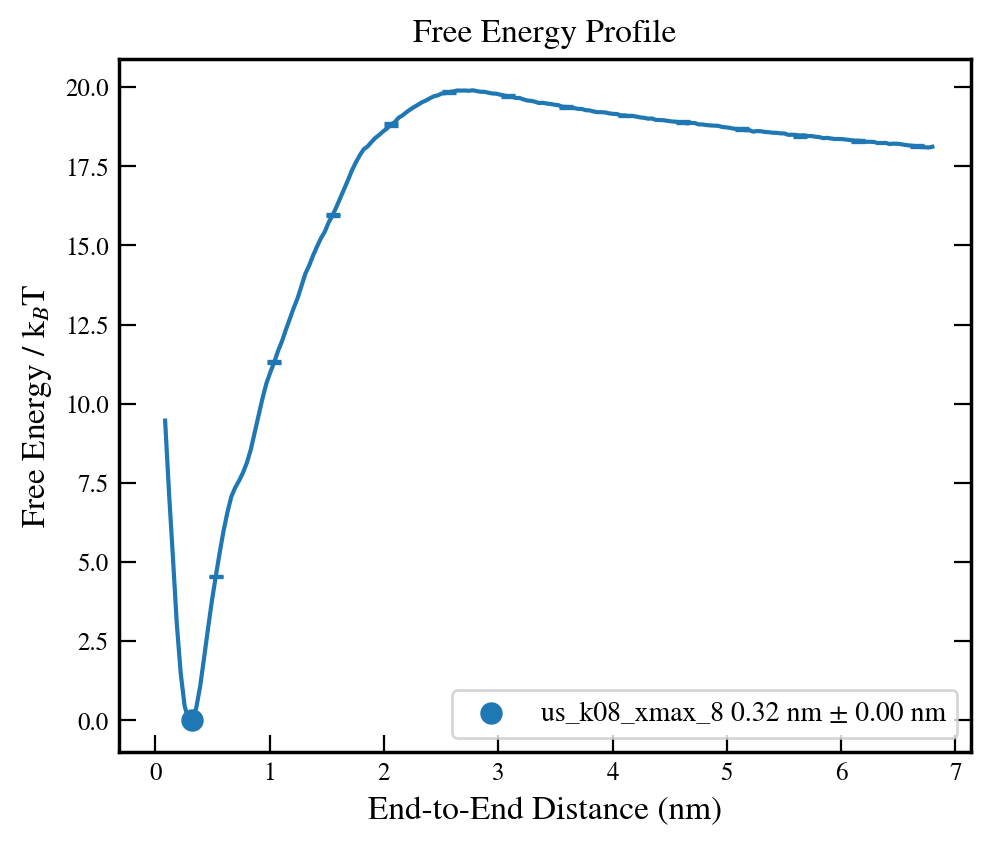

In [68]:
us.plot_free()

In [2]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/duplex_melting'
systems = ['us_melting_10', 'us_melting', 'us_melting_30','us_melting_40']

us_list = [MeltingUmbrellaSampling(file_dir, system) for system in systems]

Text(0.5, 0, 'COM Distance (nm)')

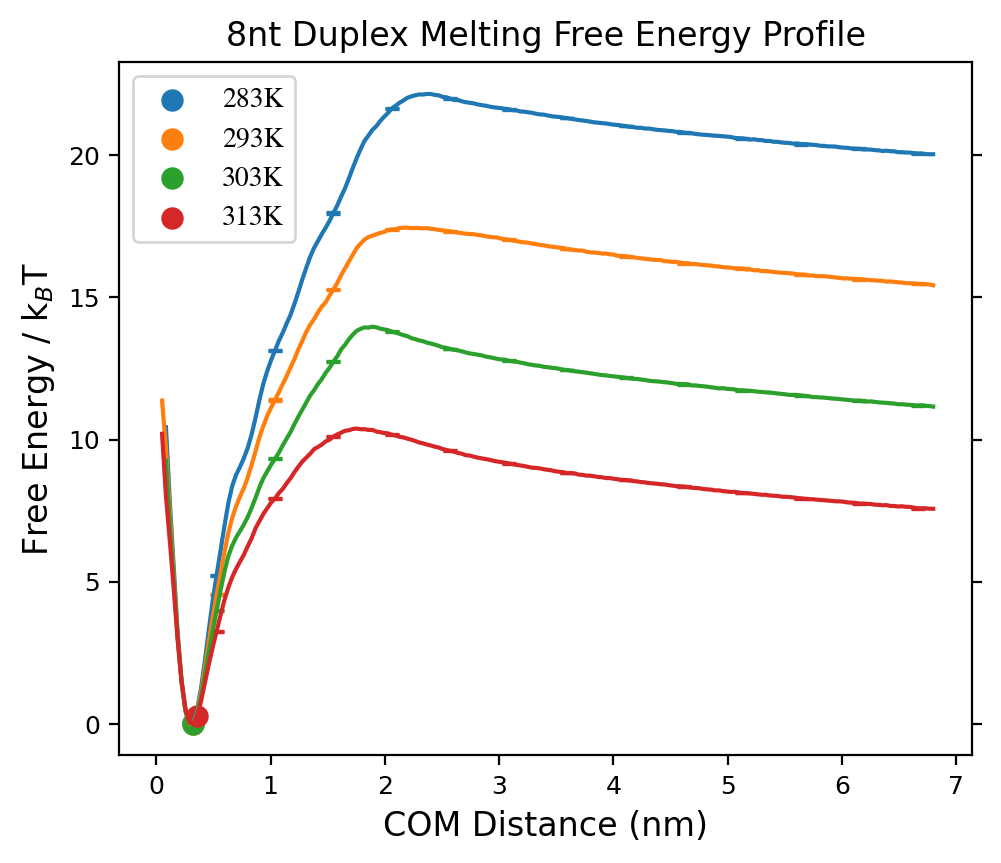

In [3]:
us_list[0].fig_ax()

for us in us_list:
    us.plot_free(ax=us_list[0].ax)
plt.legend([f'{10 + 273}K', f'{20 + 273}K', f'{30 + 273}K', f'{40 + 273}K'])
plt.title('8nt Duplex Melting Free Energy Profile')
plt.xlabel('COM Distance (nm)')

In [3]:
import pandas as pd
import numpy as np

In [17]:
free = pd.read_csv(f'{us.system_dir}/production/com_dir/freefile', sep='\t')

In [18]:
free_vals = free.iloc[-95:].Free

In [25]:
free_vals.iloc[1:]

202   -0.015874
203   -0.026385
204   -0.031292
205   -0.030753
206   -0.024777
         ...   
291    1.340639
292    1.347598
293    1.357387
294    1.370149
295    1.386318
Name: Free, Length: 94, dtype: float64

In [10]:
H_vals = np.zeros(94)
us.hb_list_observable(print_every=1e3)
for idx, sim in enumerate(us.production_sims):
    sim_dir = sim.sim_dir
    file_name = us.observables_list[1]['output']['name']
    df = pd.read_csv(f"{sim_dir}/{file_name}", header=None)
    df = np.concatenate(np.array(df))
    H, bins = np.histogram(df, density=False, bins=np.linspace(0, 8, 95))
    H_vals += H

In [11]:
prob_H = H_vals / sum(H_vals)

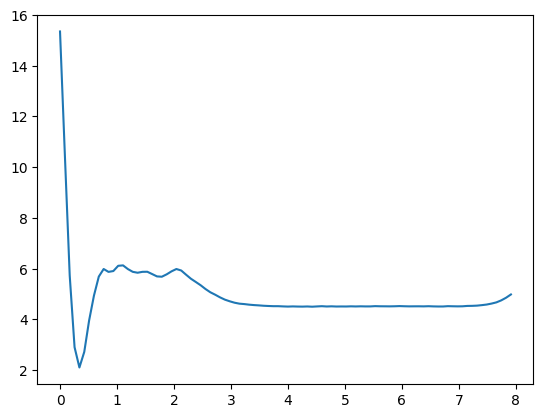

In [15]:
plt.plot(bins[:-1], -np.log(prob_H))

In [25]:
file_name = us.observables_list[0]['output']['name']

'com_distance.txt'